In [2]:
#!/usr/bin/env python
# -*- encoding: utf-8 -*-
'''
@File    :   瑞利衰落和莱斯衰落信道.ipynb
@Time    :   2025/05/05 17:28:32
@Author  :   Neutrin 
'''

# here put the import lib
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import matplotlib as mpl
# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题

# 确保Jupyter Notebook中的图表能正确显示中文
mpl.rc('font', family='SimHei')
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
def Ray_model(L):
    """
    瑞利信道模型
    
    参数:
        L : 信道实现数
    
    返回:
        H : 信道向量
    """
    # 生成两个独立的高斯随机变量，然后计算瑞利分布
    real_part = np.random.randn(1, L)
    imag_part = np.random.randn(1, L)
    H = (real_part + 1j * imag_part) / np.sqrt(2)
    return H

def Ric_model(K_dB, L):
    """
    莱斯信道模型
    
    参数:
        K_dB : K因子(dB)
        L    : 信道实现数
    
    返回:
        H    : 信道向量
    """
    # 将分贝转换为线性值
    K = 10 ** (K_dB / 10)
    
    # 生成瑞利分量
    ray_component = Ray_model(L)
    
    # 计算莱斯分布
    H = np.sqrt(K / (K + 1)) + np.sqrt(1 / (K + 1)) * ray_component
    return H

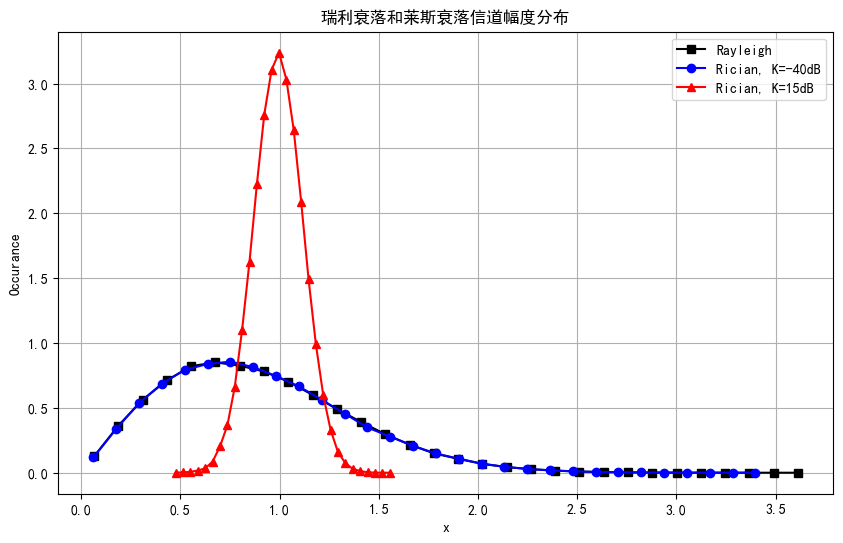

In [4]:
# 主程序
N = 200000  # 样本数
level = 30  # 直方图的条形数
K_dB = [-40, 15]  # K因子，dB

# 创建瑞利信道
Rayleigh_ch = Ray_model(N)

# 计算瑞利信道幅度的直方图数据
hist_ray, bins_ray = np.histogram(abs(Rayleigh_ch[0]), bins=level, density=True)
bin_centers_ray = (bins_ray[:-1] + bins_ray[1:]) / 2

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制瑞利信道的幅度分布
plt.plot(bin_centers_ray, hist_ray, 'k-s', label='Rayleigh')

# 为不同K因子创建莱斯信道
for i, k in enumerate(K_dB):
    # 创建莱斯信道
    Rician_ch = Ric_model(k, N)
    
    # 计算莱斯信道幅度的直方图数据
    hist_ric, bins_ric = np.histogram(abs(Rician_ch), bins=level, density=True)
    bin_centers_ric = (bins_ric[:-1] + bins_ric[1:]) / 2
    
    # 绘制莱斯信道的幅度分布
    plt.plot(bin_centers_ric, hist_ric, ['b-o', 'r-^'][i], label=f'Rician, K={k}dB')

# 设置图形属性
plt.xlabel('x')
plt.ylabel('Occurance')
plt.legend()
plt.title('瑞利衰落和莱斯衰落信道幅度分布')
plt.grid(True)

# 显示图形
plt.show()